In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
# Import zscore from scipy.stats
from scipy.stats import zscore

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
path='../data/processed/'

In [3]:
steps = pd.read_csv(f"{path}steps_with_regions_2.csv")

In [4]:
steps.shape

(181456, 18)

In [5]:
steps.isna().sum()

route_id                          0
delivery_id                       0
action                            0
step_order                        0
distance_from_previous            0
total_size                        0
cost                              0
final_price                       0
shipper_id                        0
effective_dt                      0
lat                               0
lng                               0
shipper_capacity                860
shipper_deliveries_completed      0
route_deliveries_count            0
time_from_previous                0
CODIGO                            0
NOME                              0
dtype: int64

In [6]:
steps.shipper_capacity.fillna(3, inplace=True)

In [7]:
steps.isna().sum()


route_id                        0
delivery_id                     0
action                          0
step_order                      0
distance_from_previous          0
total_size                      0
cost                            0
final_price                     0
shipper_id                      0
effective_dt                    0
lat                             0
lng                             0
shipper_capacity                0
shipper_deliveries_completed    0
route_deliveries_count          0
time_from_previous              0
CODIGO                          0
NOME                            0
dtype: int64

In [8]:
steps = pd.get_dummies(data = steps, columns=["action","NOME"])

In [9]:
steps.drop(columns=["cost","route_id","delivery_id","CODIGO","shipper_id","effective_dt","lat","lng"], inplace=True)


In [10]:
steps

,step_order,distance_from_previous,total_size,final_price,shipper_capacity,shipper_deliveries_completed,route_deliveries_count,time_from_previous,action_delivery,action_pickup,NOME_BARREIRO,NOME_CENTRO-SUL,NOME_LESTE,NOME_NORDESTE,NOME_NOROESTE,NOME_NORTE,NOME_OESTE,NOME_PAMPULHA,NOME_VENDA NOVA
0,1,0.0,1,10.00,3.0,1736.0,20.0,0.0,0,1,0,0,0,0,0,0,1,0,0
1,2,0.0,4,10.00,3.0,1736.0,20.0,0.0,0,1,0,0,0,0,0,0,1,0,0
2,3,0.0,3,10.00,3.0,1736.0,20.0,0.0,0,1,0,0,0,0,0,0,1,0,0
3,4,0.0,1,10.00,3.0,1736.0,20.0,0.0,0,1,0,0,0,0,0,0,1,0,0
4,5,0.0,3,10.00,3.0,1736.0,20.0,0.0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181451,43,0.9,2,5.00,3.0,15511.0,25.0,768.0,1,0,0,0,0,0,0,1,0,0,0
181452,44,2.1,2,4.87,3.0,15511.0,25.0,514.0,1,0,0,0,0,0,0,1,0,0,0
181453,45,3.5,2,5.74,3.0,15511.0,25.0,3458.0,1,0,0,0,0,0,0,1,0,0,0
181454,47,1.2,2,4.87,3.0,15511.0,25.0,2620.0,1,0,0,0,0,0,0,1,0,0,0


c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time_from_previous', ylabel='Density'>

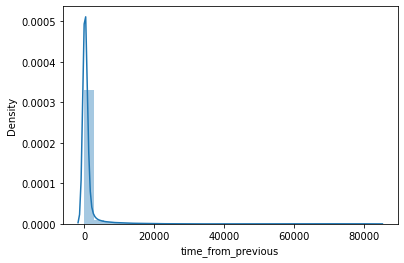

In [11]:
# Plot distribution of target variable
sns.distplot(steps['time_from_previous'], bins=30)

In [12]:
uncolapsed_steps = steps[steps['distance_from_previous'] > 0]
uncolapsed_steps["time/distance"] = uncolapsed_steps["time_from_previous"]/uncolapsed_steps["distance_from_previous"]


C:\Users\COREI7~1\AppData\Local\Temp/ipykernel_15276/2653014899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uncolapsed_steps["time/distance"] = uncolapsed_steps["time_from_previous"]/uncolapsed_steps["distance_from_previous"]


In [13]:
uncolapsed_steps_2 = uncolapsed_steps.loc[np.abs(zscore(uncolapsed_steps["time/distance"])) < 3]


In [14]:
# Get the row of the maximum value for time/distance
uncolapsed_steps.loc[uncolapsed_steps['time/distance'].idxmax()]

step_order                          67.00
distance_from_previous               0.10
total_size                           2.00
final_price                          4.87
shipper_capacity                     3.00
shipper_deliveries_completed      1575.00
route_deliveries_count              65.00
time_from_previous               83438.00
action_delivery                      1.00
action_pickup                        0.00
NOME_BARREIRO                        0.00
NOME_CENTRO-SUL                      0.00
NOME_LESTE                           0.00
NOME_NORDESTE                        0.00
NOME_NOROESTE                        0.00
NOME_NORTE                           0.00
NOME_OESTE                           1.00
NOME_PAMPULHA                        0.00
NOME_VENDA NOVA                      0.00
time/distance                   834380.00
Name: 16350, dtype: float64

In [15]:
uncolapsed_steps_2['time/distance'].describe()

count    121707.000000
mean       2215.812152
std        5361.919341
min           0.000000
25%         435.000000
50%         823.333333
75%        1785.405405
max       71930.000000
Name: time/distance, dtype: float64

In [16]:
# get just 75% quantile
uncolapsed_steps_3 = uncolapsed_steps_2.loc[uncolapsed_steps_2['time/distance'] < uncolapsed_steps_2['time/distance'].quantile(0.75)]

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time/distance', ylabel='Density'>

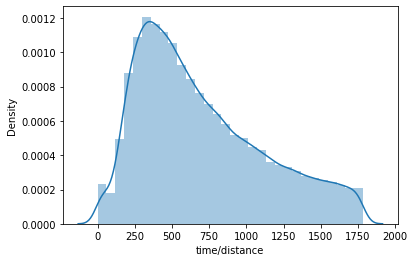

In [17]:
sns.distplot(uncolapsed_steps_3['time/distance'], bins=30)

In [18]:
uncolapsed_steps_3.describe()

,step_order,distance_from_previous,total_size,final_price,shipper_capacity,shipper_deliveries_completed,route_deliveries_count,time_from_previous,action_delivery,action_pickup,NOME_BARREIRO,NOME_CENTRO-SUL,NOME_LESTE,NOME_NORDESTE,NOME_NOROESTE,NOME_NORTE,NOME_OESTE,NOME_PAMPULHA,NOME_VENDA NOVA,time/distance
count,91280.000000,91280.000000,91280.000000,91280.000000,91280.000000,91280.000000,91280.000000,91280.000000,91280.000000,91280.000000,91280.000000,91280.000000,91280.000000,91280.000000,91280.000000,91280.000000,91280.000000,91280.000000,91280.000000,91280.000000
mean,72.012686,1.581759,2.232844,6.794614,3.053747,7585.682307,48.234695,752.717923,0.998422,0.001578,0.054733,0.321801,0.083731,0.095147,0.078944,0.045497,0.143482,0.122535,0.054130,700.541207
std,38.141882,2.787498,0.757490,3.216430,0.279570,6388.665473,23.341236,1617.226626,0.039687,0.039687,0.227459,0.467170,0.276986,0.293419,0.269653,0.208393,0.350565,0.327905,0.226276,425.852016
min,2.000000,0.100000,1.000000,4.620000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,0.300000,2.000000,4.870000,3.000000,1633.000000,22.000000,232.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,362.307692
50%,78.000000,0.600000,2.000000,5.000000,3.000000,5948.000000,61.000000,373.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,597.500000
75%,103.000000,1.400000,2.000000,8.290000,3.000000,12691.000000,67.000000,682.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,975.000000
max,150.000000,56.200000,5.000000,66.000000,5.000000,23294.000000,75.000000,38154.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1785.000000


In [19]:
steps = pd.concat([uncolapsed_steps_3, steps[steps['distance_from_previous'] == 0]])

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time_from_previous', ylabel='Density'>

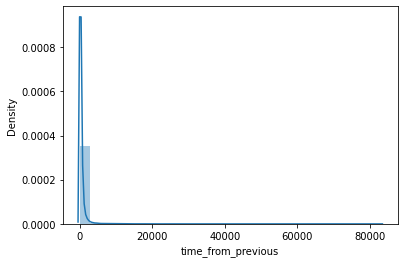

In [20]:
sns.distplot(steps['time_from_previous'], bins=30)


In [21]:
steps = steps.loc[np.abs(zscore(steps["time_from_previous"])) < 3]

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time_from_previous', ylabel='Density'>

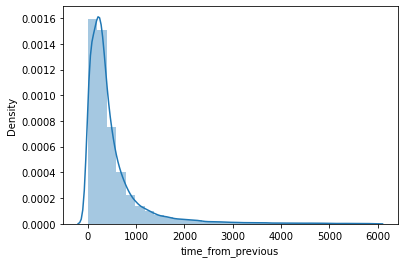

In [22]:
sns.distplot(steps.loc[steps['time_from_previous']!= 0]['time_from_previous'], bins=30)

In [23]:
steps.drop(columns=["time/distance"], inplace=True)

In [24]:
steps.shape

(148525, 19)

In [25]:
steps.shipper_capacity.fillna(3, inplace=True)

In [26]:
y = steps["time_from_previous"]
X = steps.drop(columns=["time_from_previous"])


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42)

In [28]:
X_train

,step_order,distance_from_previous,total_size,final_price,shipper_capacity,shipper_deliveries_completed,route_deliveries_count,action_delivery,action_pickup,NOME_BARREIRO,NOME_CENTRO-SUL,NOME_LESTE,NOME_NORDESTE,NOME_NOROESTE,NOME_NORTE,NOME_OESTE,NOME_PAMPULHA,NOME_VENDA NOVA
39480,85,0.0,2,4.80,3.0,15026.0,72.0,1,0,0,1,0,0,0,0,0,0,0
56853,2,0.0,1,10.00,3.0,6067.0,19.0,0,1,0,1,0,0,0,0,0,0,0
168646,97,0.4,2,4.80,3.0,19653.0,65.0,1,0,0,0,0,0,0,0,0,1,0
108238,129,2.5,2,5.00,3.0,563.0,70.0,1,0,0,0,0,0,1,0,0,0,0
371,19,2.2,3,10.00,3.0,251.0,14.0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99843,7,0.0,3,10.00,3.0,1338.0,9.0,0,1,0,0,0,0,1,0,0,0,0
44878,16,0.0,2,10.00,3.0,756.0,17.0,0,1,0,1,0,0,0,0,0,0,0
125956,71,0.0,2,4.97,3.0,359.0,55.0,1,0,0,0,1,0,0,0,0,0,0
167221,2,0.0,3,11.30,3.0,11943.0,3.0,0,1,0,0,0,0,0,0,0,1,0


In [29]:
X_NORM = X_train[X_train.columns[-11:]]

In [30]:
scaler = StandardScaler()
X_NORM[X_train.columns[:-11]] = scaler.fit_transform(X_train.iloc[:,:-11])

c:\Python39\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [31]:
X_NORM

,action_delivery,action_pickup,NOME_BARREIRO,NOME_CENTRO-SUL,NOME_LESTE,NOME_NORDESTE,NOME_NOROESTE,NOME_NORTE,NOME_OESTE,NOME_PAMPULHA,NOME_VENDA NOVA,step_order,distance_from_previous,total_size,final_price,shipper_capacity,shipper_deliveries_completed,route_deliveries_count
39480,1,0,0,1,0,0,0,0,0,0,0,0.545037,-0.428932,-0.394822,-0.746826,-0.182866,1.246441,1.153367
56853,0,1,0,1,0,0,0,0,0,0,0,-1.349982,-0.428932,-1.516426,0.689277,-0.182866,-0.185905,-0.944707
168646,1,0,0,0,0,0,0,0,0,1,0,0.819015,-0.230668,-0.394822,-0.746826,-0.182866,1.986195,0.876263
108238,1,0,0,0,0,0,1,0,0,0,0,1.549624,0.810215,-0.394822,-0.691591,-0.182866,-1.065873,1.074195
371,1,0,0,0,0,0,0,0,1,0,0,-0.961845,0.661517,0.726782,0.689277,-0.182866,-1.115755,-1.142638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99843,0,1,0,0,0,0,1,0,0,0,0,-1.235824,-0.428932,0.726782,0.689277,-0.182866,-0.941968,-1.340570
44878,0,1,0,1,0,0,0,0,0,0,0,-1.030340,-0.428932,-0.394822,0.689277,-0.182866,-1.035017,-1.023879
125956,1,0,0,0,1,0,0,0,0,0,0,0.225395,-0.428932,-0.394822,-0.699876,-0.182866,-1.098488,0.480400
167221,0,1,0,0,0,0,0,0,0,1,0,-1.349982,-0.428932,0.726782,1.048302,-0.182866,0.753537,-1.578088


In [32]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_NORM.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.SGD(lr=0.01, nesterov=True, clipnorm=1)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [33]:
model = build_model()

c:\Python39\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


In [35]:
example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 1s 1s/step


array([[4491.6924 ],
       [1810.841  ],
       [5872.0366 ],
       [ 168.566  ],
       [  75.55835],
       [3626.575  ],
       [1593.2365 ],
       [6774.9395 ],
       [1213.9197 ],
       [4799.945  ]], dtype=float32)

In [36]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
            label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
            label = 'Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
            label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val Error')
  plt.legend()
  plt.show()

Epoch 1/512
2600/2600 [==============================] - 12s 4ms/step - loss: 230003.1875 - mae: 231.8506 - mse: 230003.1875 - val_loss: 182335.8906 - val_mae: 191.3648 - val_mse: 182335.8906
Epoch 2/512
2600/2600 [==============================] - 8s 3ms/step - loss: 170745.4219 - mae: 183.4058 - mse: 170745.4219 - val_loss: 181023.1250 - val_mae: 184.4083 - val_mse: 181023.1250
Epoch 3/512
2600/2600 [==============================] - 7s 3ms/step - loss: 169046.2344 - mae: 180.4499 - mse: 169046.2344 - val_loss: 178183.0938 - val_mae: 187.1814 - val_mse: 178183.0938
Epoch 4/512
2600/2600 [==============================] - 8s 3ms/step - loss: 165996.7812 - mae: 178.7265 - mse: 165996.7812 - val_loss: 175689.3594 - val_mae: 181.0204 - val_mse: 175689.3594
Epoch 5/512
2600/2600 [==============================] - 9s 3ms/step - loss: 162602.0000 - mae: 176.3693 - mse: 162602.0000 - val_loss: 171455.3594 - val_mae: 178.9000 - val_mse: 171455.3594
Epoch 6/512
2600/2600 [=====================

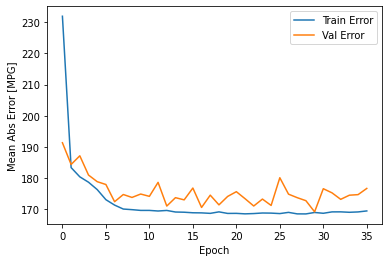

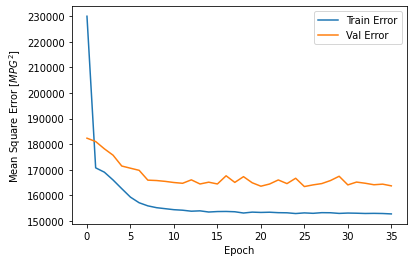

In [37]:
EPOCHS = 512

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
  X_NORM,
  y_train,
  epochs=EPOCHS,
  validation_split = 0.2,
  verbose=1,
  callbacks=[early_stop]
)

plot_history(history)

In [38]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35]

In [39]:
pd.DataFrame(history.history)

,loss,mae,mse,val_loss,val_mae,val_mse
0,230003.187500,231.850647,230003.187500,182335.890625,191.364807,182335.890625
1,170745.421875,183.405792,170745.421875,181023.125000,184.408310,181023.125000
2,169046.234375,180.449936,169046.234375,178183.093750,187.181412,178183.093750
3,165996.781250,178.726456,165996.781250,175689.359375,181.020386,175689.359375
4,162602.000000,176.369308,162602.000000,171455.359375,178.900009,171455.359375
5,159289.375000,173.131897,159289.375000,170602.359375,177.993225,170602.359375
6,157093.671875,171.404694,157093.671875,169772.015625,172.487289,169772.015625
7,155883.218750,170.138412,155883.218750,165933.734375,174.791107,165933.734375
8,155170.250000,169.944031,155170.250000,165783.109375,173.854065,165783.109375
9,154775.281250,169.702957,154775.281250,165451.859375,174.942917,165451.859375


In [40]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
31,153006.578125,169.227859,153006.578125,165179.953125,175.326553,165179.953125,31
32,152904.015625,169.239639,152904.015625,164721.406250,173.247604,164721.406250,32
33,152949.906250,169.101013,152949.906250,164134.171875,174.572037,164134.171875,33
34,152892.359375,169.214737,152892.359375,164368.921875,174.753433,164368.921875,34
35,152732.437500,169.534714,152732.437500,163702.328125,176.739761,163702.328125,35


In [41]:
normed_test_data = X_test[X_test.columns[:-11]]
normed_test_data = X_test[X_test.columns[-11:]]
normed_test_data[X_test.columns[:-11]] = scaler.fit_transform(X_test.iloc[:,:-11])

c:\Python39\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [42]:
normed_test_data.shape

(44558, 18)

In [43]:
model.evaluate(normed_test_data, y_test, verbose=0)


[152913.890625, 170.97352600097656, 152913.890625]

In [44]:
model.evaluate(normed_test_data, y_test, verbose=0)

[152913.890625, 170.97352600097656, 152913.890625]

In [45]:
model.evaluate(normed_test_data, y_test, verbose=0)

[152913.890625, 170.97352600097656, 152913.890625]

In [46]:
model.evaluate(normed_test_data, y_test, verbose=0)

[152913.890625, 170.97352600097656, 152913.890625]

In [47]:
# Get R2 score
y_pred = model.predict(normed_test_data)


1393/1393 [==============================] - 3s 2ms/step


In [48]:
r2_score(y_test, y_pred)

0.5942755780667482

In [54]:
# GET RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

391.0420647747714

In [53]:
# GET MAE
mean_absolute_error(y_test, y_pred)

170.97365099271124

In [50]:
X_test.iloc[2]

step_order                        12.0
distance_from_previous             1.2
total_size                         5.0
final_price                       10.0
shipper_capacity                   3.0
shipper_deliveries_completed    1736.0
route_deliveries_count             7.0
action_delivery                    1.0
action_pickup                      0.0
NOME_BARREIRO                      0.0
NOME_CENTRO-SUL                    0.0
NOME_LESTE                         0.0
NOME_NORDESTE                      1.0
NOME_NOROESTE                      0.0
NOME_NORTE                         0.0
NOME_OESTE                         0.0
NOME_PAMPULHA                      0.0
NOME_VENDA NOVA                    0.0
Name: 131931, dtype: float64

In [51]:
y_test.iloc[2]

401.0

In [52]:
y_pred[2]

array([622.5926], dtype=float32)